# Assignment-04-Simple-Linear-Regression-2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 1

### Importing Data 

In [3]:
df = pd.read_csv('04_02_Salary_Data.csv')
df.head(4)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0


## Step 2

## EDA and Data Visualization

### Checking datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Checking for Null Values

In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Checking for Duplicate Values

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df[df.duplicated()]

,YearsExperience,Salary


## Step 3

### Plotting the data to check for outliers

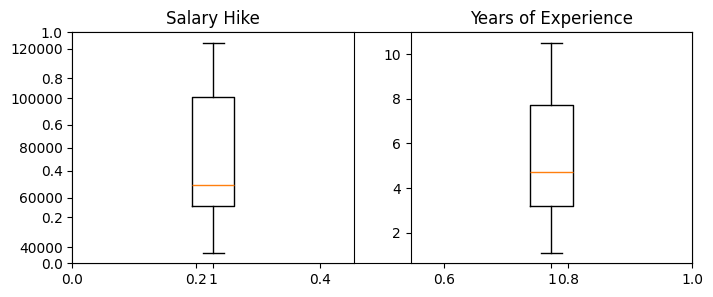

In [9]:
plt.subplots(figsize = (8,3))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

#### As you can see there are no Outliers in the data

## Step 4

### Checking the Correlation between variables

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Visualization of Correlation beteen x and y

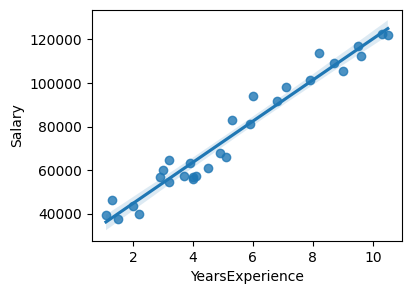

In [11]:
fig = plt.figure(figsize=(4,3))
sns.regplot(x=df['YearsExperience'],y=df['Salary'])  
plt.show()

As you can see above
<ul>
<li>There is good correlation between the two variable.</ki>
<li>The score is more than 0.8 which is a good sign.</li>
</ul>

## Step 5

### Checking for Homoscedasticity or Hetroscedasticity

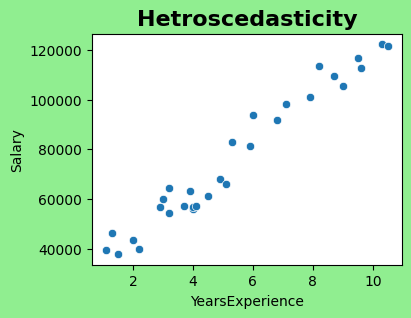

In [12]:
plt.figure(figsize = (4,3), facecolor = 'lightgreen')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [13]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

As you can see in above graph
<ul>
<li>It shows as the Salary Increases Years of Experience also increases with much variation along the way.</li>
<li>The data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.</li>
</ul>

## Step 6

### Feature Engineering

#### Trying different transformation of data to estimate normal distribution and to remove any skewness.

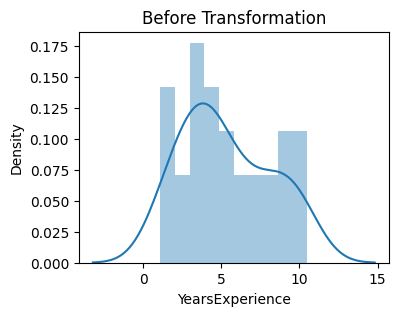

In [14]:
plt.figure(figsize = (4,3))
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
plt.show()

<Figure size 300x200 with 0 Axes>

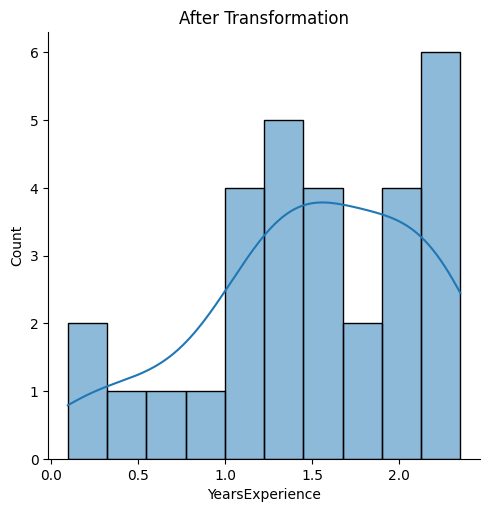

In [15]:
plt.figure(figsize = (3,2))
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

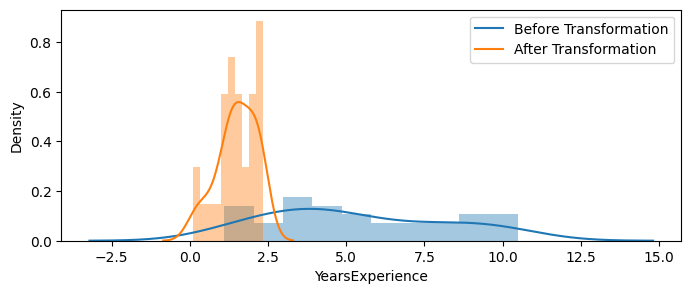

In [16]:
labels = ['Before Transformation','After Transformation']
plt.figure(figsize=(8,3))
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

As you can see
<ul>
<li>How log transformation affects the data and it scales the values down.</li>
<li>Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)</li>
</ul>

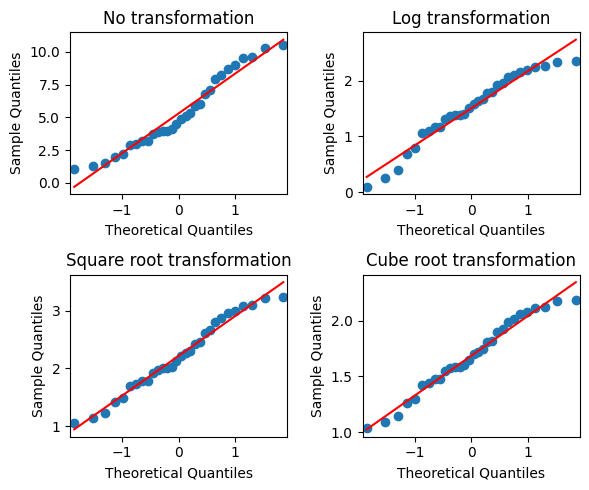

In [17]:
import statsmodels.graphics.gofplots as smg

fig, axs = plt.subplots(2, 2, figsize=(6, 5))

smg.qqplot(df['YearsExperience'], line='r', ax=axs[0, 0])
axs[0, 0].set_title('No transformation')
smg.qqplot(np.log(df['YearsExperience']), line='r', ax=axs[0, 1])
axs[0, 1].set_title('Log transformation')
smg.qqplot(np.sqrt(df['YearsExperience']), line='r', ax=axs[1, 0])
axs[1, 0].set_title('Square root transformation')
smg.qqplot(np.cbrt(df['YearsExperience']), line='r', ax=axs[1, 1])
axs[1, 1].set_title('Cube root transformation')
plt.tight_layout()
plt.show()

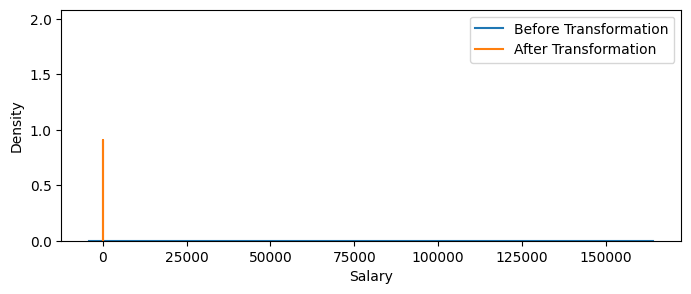

In [18]:
labels = ['Before Transformation','After Transformation']
plt.figure(figsize=(8,3))
sns.distplot(df['Salary'], bins = 10, kde = True)
sns.distplot(np.log(df['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

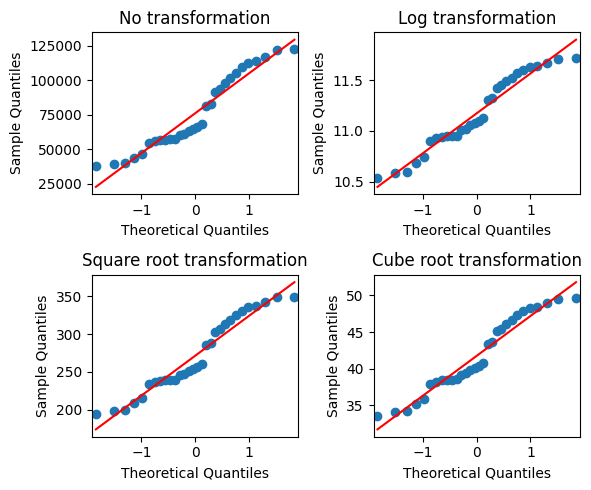

In [19]:
import statsmodels.graphics.gofplots as smg

fig, axs = plt.subplots(2, 2, figsize=(6, 5))

smg.qqplot(df['Salary'], line='r', ax=axs[0, 0])
axs[0, 0].set_title('No transformation')
smg.qqplot(np.log(df['Salary']), line='r', ax=axs[0, 1])
axs[0, 1].set_title('Log transformation')
smg.qqplot(np.sqrt(df['Salary']), line='r', ax=axs[1, 0])
axs[1, 0].set_title('Square root transformation')
smg.qqplot(np.cbrt(df['Salary']), line='r', ax=axs[1, 1])
axs[1, 1].set_title('Cube root transformation')
plt.tight_layout()
plt.show()

Important Note:  
We only Perform any data transformation when the data is skewed or not normal

## Step 7

### Creating a Linear Regression Model

#### Using Ordinary least squares (OLS) regressione

#### It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

#### Model Building or Model Fitting

In [20]:
model = smf.ols("Salary~YearsExperience",data=df)
result1 = model.fit()

#### Model Testing

##### R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.  

##### Measure goodness-of-fit by finding rsquared values (percentage of variance)  

In [21]:
result1.rsquared , result1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

As you can notice in the above model
<ul>
<li>The R-squared and Adjusted R-squared scores are above 0.85.</li>
<li>(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)</li>
</ul>
Lets Try some data transformation to check whether these scores can get any higher than this.

### Creating LR Model on Square Root transformation of data

#### Model Building or Model Fitting

In [22]:
model2 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df)
result2 = model2.fit()

#### Model Testing

##### R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

In [23]:
result2.rsquared , result2.rsquared_adj

(0.9419490138976825, 0.9398757643940283)

After Square Root transformation on the Data,
<ul>
<li>R-squared scores have decreased from 0.9569 to 0.9419.</li>
</ul>
Lets Try other data transformation to check whether these scores can get any higher than this.

### Creating LR Model on Cube Root transformation of data

#### Model Building or Model Fitting

In [24]:
model3 = smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df)
result3 = model3.fit()

#### Model Testing

In [25]:
result3.rsquared , result3.rsquared_adj

(0.9324434036761005, 0.9300306680931041)

After Cube Root transformation on the Data,
<ul>
<li>R-squared scores have decreased from 0.9419 to 0.9324.</li>
</ul>
Lets Try other data transformation to check whether these scores can get any higher than this.

### Creating LR Model on Log Root transformation of data

#### Model Building or Model Fitting

In [26]:
model4 = smf.ols('np.log(Salary)~np.log(YearsExperience)', data = df)
result4 = model4.fit()

#### Model Testing

In [27]:
result4.rsquared , result4.rsquared_adj

(0.905215072581715, 0.9018298966024905)

After Log transformation on the Data,
<ul>
<li>R-squared scores have decreased from 0.9324 to 0.9052.</li>
</ul>
we can stop here.

##### Determination Coefficient = rsquared value = 0.9569 for Model result1 ; very good fit >= 85%

In [28]:
result1.rsquared , result1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

As Y = Beta0 + Beta1*(X)

Finding Coefficient Parameters (Beta0 and Beta1 values)

In [29]:
result1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [30]:
result1.tvalues, result1.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

## Step 8

### Test for Normality of Residuals (Q-Q Plot)

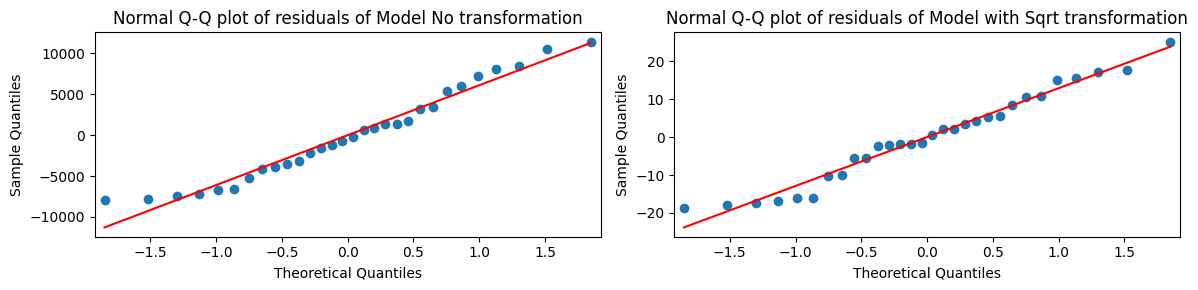

In [31]:
import statsmodels.graphics.gofplots as smg

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

smg.qqplot(result1.resid, line='r', ax=axs[0])
axs[0].set_title('Normal Q-Q plot of residuals of Model No transformation')
smg.qqplot(result2.resid, line='r', ax=axs[1])
axs[1].set_title('Normal Q-Q plot of residuals of Model with Sqrt transformation')
plt.tight_layout()
plt.show()

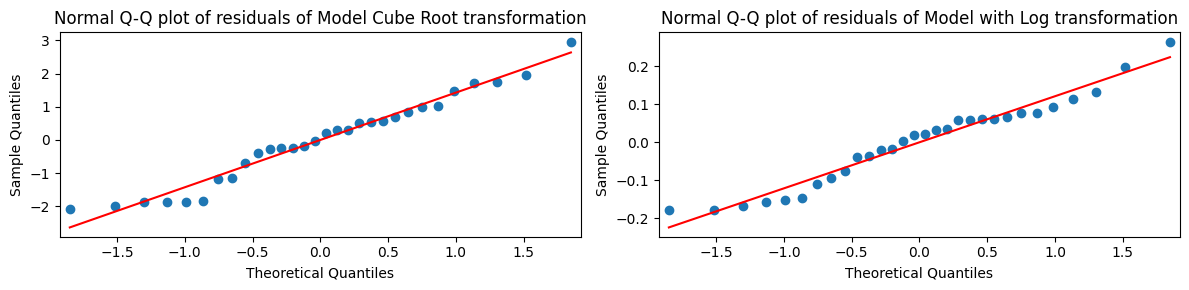

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

smg.qqplot(result3.resid, line='r', ax=axs[0])
axs[0].set_title('Normal Q-Q plot of residuals of Model Cube Root transformation')
smg.qqplot(result4.resid, line='r', ax=axs[1])
axs[1].set_title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.tight_layout()
plt.show()

As you can notice in the above plots, The Models have slightly different plots
<ul>
<li>The first model without transformation follows normal distribution.</li>
</ul>

## Step 9

### Model Validation

#### Comparing different models with respect to their Root Mean Squared Errors
#### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
result1_pred_y = result1.predict(df['YearsExperience'])
result2_pred_y = pow(result2.predict(df['YearsExperience']),2)
result3_pred_y = pow(result3.predict(df['YearsExperience']),3)
result4_pred_y = np.exp(result4.predict(df['YearsExperience']))

In [35]:
result1_rmse = np.sqrt(mean_squared_error(df['Salary'], result1_pred_y))
result2_rmse = np.sqrt(mean_squared_error(df['Salary'], result2_pred_y))
result3_rmse = np.sqrt(mean_squared_error(df['Salary'], result3_pred_y))
result4_rmse = np.sqrt(mean_squared_error(df['Salary'], result4_pred_y))
print('result1 =', result1_rmse,'\n' 'result2 =', result2_rmse,'\n' 'result3 =', result3_rmse,'\n' 'result4 =', result4_rmse )

result1 = 5592.043608760662 
result2 = 5960.64709617431 
result3 = 6232.815455835842 
result4 = 7219.716974372806


#### As 1st Model has the minimum RMSE of 5592.04 and highest R-squared score of 0.9569. Hence, we are going to use 1st Model to predict our values.  
#### 1st Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest R-squared value.

## Step 10

### Predicting values from Model without Transformation on the Data

In [36]:
# first model results without any transformation
predicted = pd.DataFrame()
predicted['YearsExperience'] = df.YearsExperience
predicted['Salary'] = df.Salary
predicted['Predicted_Salary_Hike'] = pd.DataFrame(result1.predict(predicted.YearsExperience))
predicted.head()

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
